In [121]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [122]:
torch.__version__

'2.0.1+cu118'

### Create a linear regression using torch.nn module.

In [123]:
# Create *known* parameters
weight = 0.7
bias = 0.25

# Create data
start = 0
end = 2
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2500],
         [0.2640],
         [0.2780],
         [0.2920],
         [0.3060]]))

   ### Split the dataset into train and test

In [124]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

print(f"X_train len: {len(X_train)}, X_test len: {len(X_test)} , y_train len: {len(y_train)}, y_test len: {len(y_test)}")

X_train len: 80, X_test len: 20 , y_train len: 80, y_test len: 20


In [125]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    

    plt.figure(figsize=(6, 6))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=5, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=5, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

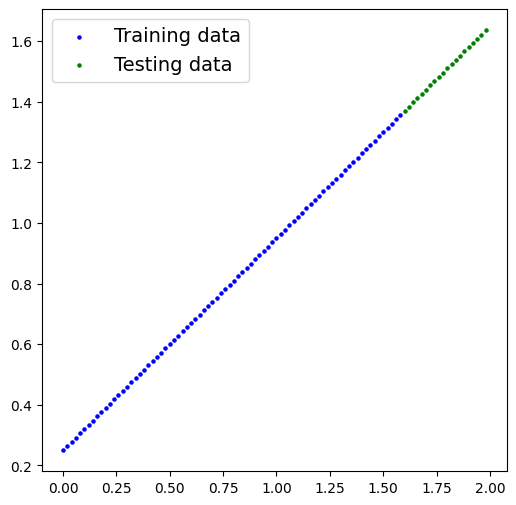

In [126]:
plot_predictions()

### Build the model

In [127]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [128]:
torch.manual_seed(0)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True),
 Parameter containing:
 tensor([-0.2934], requires_grad=True)]

In [129]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

In [130]:
with torch.inference_mode():
    y_preds = model_0(X_test)


In [131]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([[2.1722],
        [2.2030],
        [2.2338],
        [2.2646],
        [2.2954],
        [2.3263],
        [2.3571],
        [2.3879],
        [2.4187],
        [2.4495],
        [2.4804],
        [2.5112],
        [2.5420],
        [2.5728],
        [2.6036],
        [2.6345],
        [2.6653],
        [2.6961],
        [2.7269],
        [2.7577]])


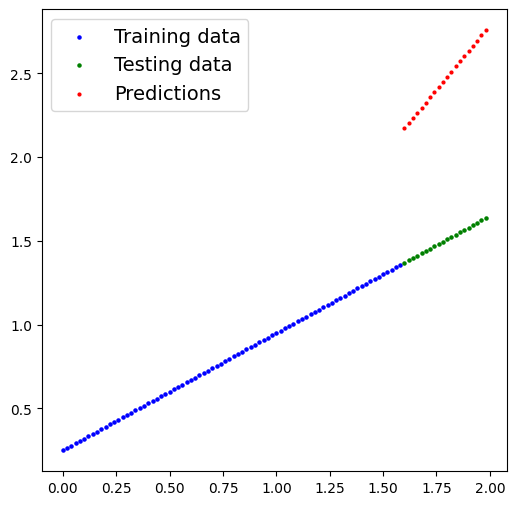

In [132]:
plot_predictions(predictions=y_preds)

In [133]:
y_test - y_preds

tensor([[-0.8022],
        [-0.8190],
        [-0.8358],
        [-0.8526],
        [-0.8694],
        [-0.8863],
        [-0.9031],
        [-0.9199],
        [-0.9367],
        [-0.9535],
        [-0.9704],
        [-0.9872],
        [-1.0040],
        [-1.0208],
        [-1.0376],
        [-1.0545],
        [-1.0713],
        [-1.0881],
        [-1.1049],
        [-1.1217]])

### Train Model

In [134]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [135]:
torch.manual_seed(1)

epochs = 3300

train_loss_values = list()
test_loss_values = list()
epoch_count = list()
for epoch in range(epochs):
    # training 
    
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #testing
    model_0.eval()
    
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_function(test_pred, y_test.type(torch.float))
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    

Epoch: 0 | MAE Train Loss: 0.3472638726234436 | MAE Test Loss: 0.9608375430107117 
Epoch: 10 | MAE Train Loss: 0.34419113397598267 | MAE Test Loss: 0.949673056602478 
Epoch: 20 | MAE Train Loss: 0.34111839532852173 | MAE Test Loss: 0.9385086894035339 
Epoch: 30 | MAE Train Loss: 0.3382313847541809 | MAE Test Loss: 0.9277796745300293 
Epoch: 40 | MAE Train Loss: 0.33541053533554077 | MAE Test Loss: 0.9171597361564636 
Epoch: 50 | MAE Train Loss: 0.33258965611457825 | MAE Test Loss: 0.9065397381782532 
Epoch: 60 | MAE Train Loss: 0.3298690915107727 | MAE Test Loss: 0.8961974382400513 
Epoch: 70 | MAE Train Loss: 0.32728755474090576 | MAE Test Loss: 0.8861324191093445 
Epoch: 80 | MAE Train Loss: 0.32470595836639404 | MAE Test Loss: 0.8760677576065063 
Epoch: 90 | MAE Train Loss: 0.3221244215965271 | MAE Test Loss: 0.8660026788711548 
Epoch: 100 | MAE Train Loss: 0.31975501775741577 | MAE Test Loss: 0.8564993739128113 
Epoch: 110 | MAE Train Loss: 0.3173985481262207 | MAE Test Loss: 0.846

Epoch: 1520 | MAE Train Loss: 0.1609996259212494 | MAE Test Loss: 0.3198893070220947 
Epoch: 1530 | MAE Train Loss: 0.16008880734443665 | MAE Test Loss: 0.3178435266017914 
Epoch: 1540 | MAE Train Loss: 0.1591784507036209 | MAE Test Loss: 0.3159340023994446 
Epoch: 1550 | MAE Train Loss: 0.15826942026615143 | MAE Test Loss: 0.3140925467014313 
Epoch: 1560 | MAE Train Loss: 0.1573599874973297 | MAE Test Loss: 0.31231921911239624 
Epoch: 1570 | MAE Train Loss: 0.15645086765289307 | MAE Test Loss: 0.31047773361206055 
Epoch: 1580 | MAE Train Loss: 0.1555415242910385 | MAE Test Loss: 0.3087044358253479 
Epoch: 1590 | MAE Train Loss: 0.1546323150396347 | MAE Test Loss: 0.306863009929657 
Epoch: 1600 | MAE Train Loss: 0.1537230759859085 | MAE Test Loss: 0.3050895929336548 
Epoch: 1610 | MAE Train Loss: 0.15281380712985992 | MAE Test Loss: 0.30324825644493103 
Epoch: 1620 | MAE Train Loss: 0.1519046425819397 | MAE Test Loss: 0.3014748692512512 
Epoch: 1630 | MAE Train Loss: 0.1509952843189239

Epoch: 3030 | MAE Train Loss: 0.023695573210716248 | MAE Test Loss: 0.04689529538154602 
Epoch: 3040 | MAE Train Loss: 0.022786149755120277 | MAE Test Loss: 0.045053474605083466 
Epoch: 3050 | MAE Train Loss: 0.021877054125070572 | MAE Test Loss: 0.04327968880534172 
Epoch: 3060 | MAE Train Loss: 0.020967554301023483 | MAE Test Loss: 0.04143786430358887 
Epoch: 3070 | MAE Train Loss: 0.020058462396264076 | MAE Test Loss: 0.03966407850384712 
Epoch: 3080 | MAE Train Loss: 0.01914893090724945 | MAE Test Loss: 0.03782237321138382 
Epoch: 3090 | MAE Train Loss: 0.018239840865135193 | MAE Test Loss: 0.03604857996106148 
Epoch: 3100 | MAE Train Loss: 0.017330322414636612 | MAE Test Loss: 0.03427477926015854 
Epoch: 3110 | MAE Train Loss: 0.01642121747136116 | MAE Test Loss: 0.03243296220898628 
Epoch: 3120 | MAE Train Loss: 0.015511805191636086 | MAE Test Loss: 0.030659163370728493 
Epoch: 3130 | MAE Train Loss: 0.014602622017264366 | MAE Test Loss: 0.028817366808652878 
Epoch: 3140 | MAE Tr

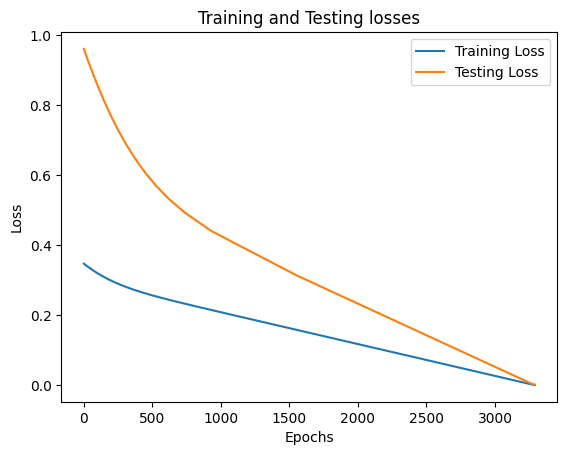

In [136]:
plt.plot(epoch_count, train_loss_values, label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and Testing losses")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [137]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6998])), ('bias', tensor([0.2495]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.25


### Making prediction

In [138]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[1.3692],
        [1.3832],
        [1.3972],
        [1.4112],
        [1.4252],
        [1.4392],
        [1.4532],
        [1.4672],
        [1.4812],
        [1.4952],
        [1.5092],
        [1.5232],
        [1.5372],
        [1.5512],
        [1.5652],
        [1.5792],
        [1.5932],
        [1.6071],
        [1.6211],
        [1.6351]])

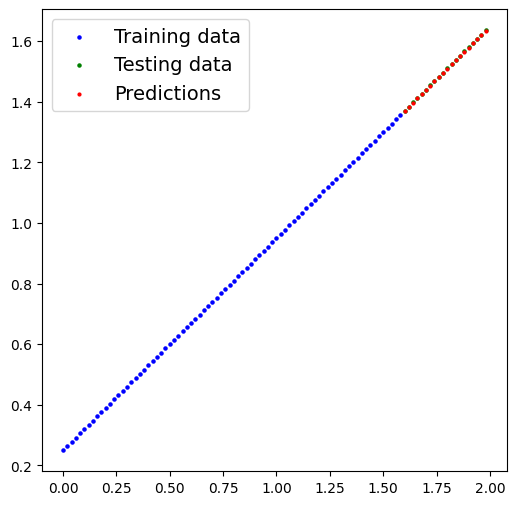

In [139]:
plot_predictions(predictions=y_preds)

### Saving and Loading PyTorch model

In [143]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [147]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [149]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [150]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])